In [2]:
import numpy as np
import os
import random
import pandas as pd
import sklearn.datasets, sklearn.decomposition, sklearn.discriminant_analysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cmath
import math
from scipy.integrate import quad  
from scipy.stats import moment

#a)
x1=np.load('jonction.npz')['data']
x1=x1.flatten()
X = 5*(x1-np.mean(x1))/(np.max(np.abs(x1-np.mean(x1))))
y1=np.random.normal(0, 1, X.shape[0])
Y= 5*(y1-np.mean(y1))/(np.max(np.abs(y1-np.mean(y1))))

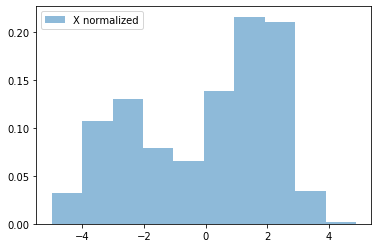

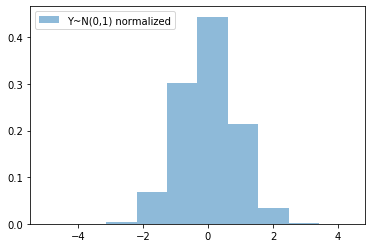

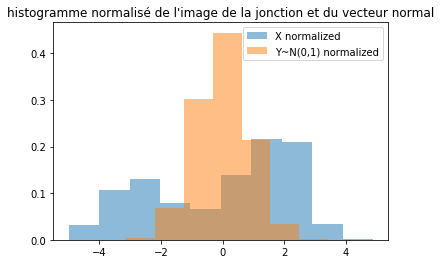

In [3]:
plt.hist(X,alpha=0.5,label='X normalized',density= True)
plt.legend()
plt.show()
plt.hist(Y,alpha=0.5,label='Y~N(0,1) normalized',density= True)
plt.legend()
plt.show()
plt.hist(X,alpha=0.5,label='X normalized',density= True)
plt.hist(Y,alpha=0.5,label='Y~N(0,1) normalized',density= True)
plt.legend()
plt.title("histogramme normalisé de l'image de la jonction et du vecteur normal")
plt.show()

In [4]:
#c)
def M_Y(t):
    return quad(lambda x: np.exp(((-1)*(x**2)+2*x*t)/2)/np.sqrt(2*np.pi),-5,5)[0]

def M_X(x,B):
    hist_x=np.histogram(X,bins=B,density= True)
    def M_X_t(t):
        temp=0
        for i in range(B):
            f=hist_x[0][i]
            x_0=hist_x[1][i]
            x_1=hist_x[1][i+1]
            temp=temp+f*np.exp(x_0*t)*(x_1-x_0)
        return temp
    return M_X_t

n=100
D=np.linspace(-5, 5, n)

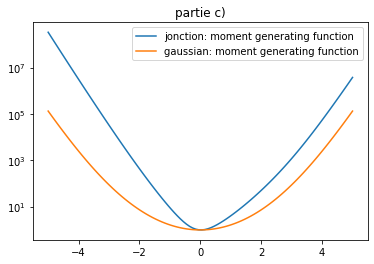

In [5]:
mx = M_X(X,50)

mxx = np.zeros(n)
myy = np.zeros(n)

itera = 0
for i in D:
    mxx[itera] = mx(i)
    myy[itera] = M_Y(i)
    itera = itera + 1

plt.plot(D, mxx, label='jonction: moment generating function')
plt.plot(D, myy, label='gaussian: moment generating function')
plt.legend()
plt.title('partie c)')
plt.yscale('log')
plt.show()

In [7]:
#d)
#trop lent, on obtient résultats similaires à ci-dessous fct scipy
'''def moment(X,n):
    t=0
    for k in X:
        t=t+(k)**n
    return t/len(X)
X_mom=[moment(X,i) for i in range(7)]  
Y_mom=[moment(Y,i) for i in range(7)]
print(X_mom)
print(Y_mom)'''


X_mom=[moment(X,i) for i in range(7)]  
Y_mom=[moment(Y,i) for i in range(7)]
print(np.round(X_mom,2))
print(np.round(Y_mom,2))

[  1.     0.     4.97  -4.62  45.06 -86.28 542.92]
[ 1.    0.    0.71 -0.    1.52  0.    5.41]


In [6]:
#e)
def mu(x, n):
    return np.sum(x ** n) / x.shape[0]


def phi(x, N,t):
    out = 0
    for i in range(N):
        out = out + (t**i)*(mu(x, i) / math.factorial(i))
    return out


v1=[]
v2=[]
v3=[]
v4=[]
v5=[]
v6=[]
for i in np.linspace(-5,5,50):
    v1.append(phi(X,1,i))
    v2.append(phi(X,2,i))
    v3.append(phi(X,3,i))
    v4.append(phi(X,4,i))
    v5.append(phi(X,5,i))
    v6.append(phi(X,6,i))
    

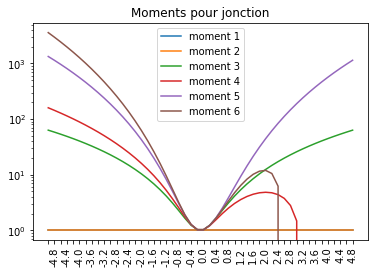

In [41]:
ax= plt.axes()
ax.plot(v1,label='moment 1')
ax.plot(v2,label='moment 2')
ax.plot(v3,label='moment 3')
ax.plot(v4,label='moment 4')
ax.plot(v5,label='moment 5')
ax.plot(v6,label='moment 6')
ax.legend()
plt.title('Moments pour jonction')
plt.yscale('log')
plt.xticks(range(50), np.linspace(-25, 24, 50)/5)
ax = plt.gca()
plt.xticks(rotation=90)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()

In [8]:
s1=[]
s2=[]
s3=[]
s4=[]
s5=[]
s6=[]
for i in np.linspace(-5,5,50):
    s1.append(phi(Y,1,i))
    s2.append(phi(Y,2,i))
    s3.append(phi(Y,3,i))
    s4.append(phi(Y,4,i))
    s5.append(phi(Y,5,i))
    s6.append(phi(Y,6,i))

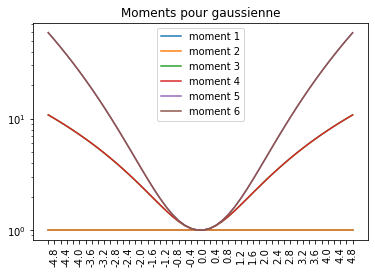

In [42]:
ax= plt.axes()
ax.plot(s1,label='moment 1')
ax.plot(s2,label='moment 2')
ax.plot(s3,label='moment 3')
ax.plot(s4,label='moment 4')
ax.plot(s5,label='moment 5')
ax.plot(s6,label='moment 6')
ax.legend()
plt.title('Moments pour gaussienne')
plt.yscale('log')
plt.xticks(range(50), np.linspace(-25, 24, 50)/5)
ax = plt.gca()
plt.xticks(rotation=90)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()